In [243]:
import pandas as pd
from sklearn.metrics import r2_score
def load_data(path):
    return pd.read_csv(path)


In [244]:
fire_data = load_data('../data/forestfires.csv')
fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


In [245]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
X        379 non-null int64
Y        379 non-null int64
month    379 non-null object
day      379 non-null object
FFMC     379 non-null float64
DMC      379 non-null float64
DC       379 non-null float64
ISI      379 non-null float64
temp     379 non-null float64
RH       379 non-null int64
wind     379 non-null float64
rain     379 non-null float64
area     379 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 38.6+ KB


In [246]:
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,4.788918,4.374670,90.791557,120.993404,568.758575,9.127441,19.364908,44.825858,4.006069,0.029024,17.525198
std,2.372190,1.167003,5.873637,67.340163,237.121765,4.092009,6.088528,16.329811,1.842873,0.345342,73.818628
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.500000,84.400000,470.600000,6.800000,16.050000,33.000000,2.700000,0.000000,0.000000
50%,5.000000,4.000000,91.700000,115.400000,666.700000,8.400000,20.100000,42.000000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,93.100000,157.300000,731.150000,11.400000,23.450000,54.000000,4.900000,0.000000,9.985000
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,100.000000,9.400000,6.400000,1090.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22783510>,
      dtype=object)

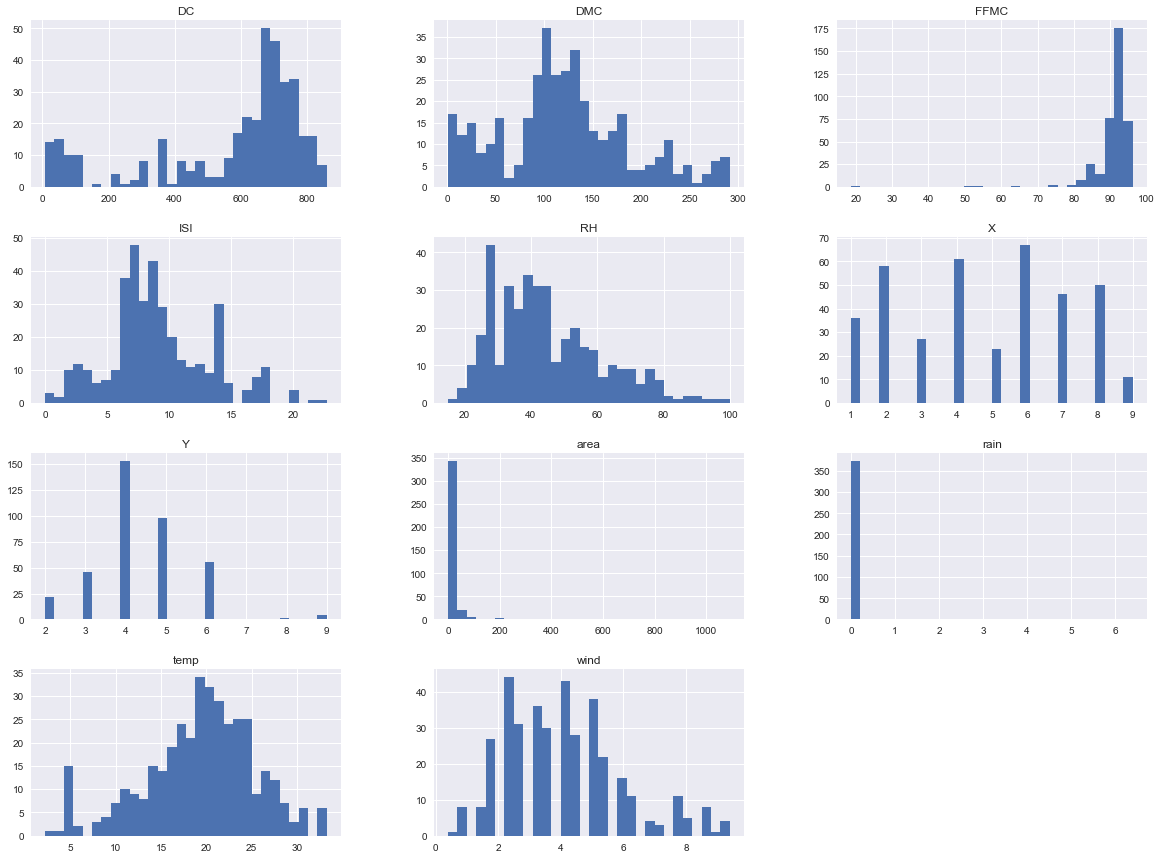

In [247]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fire_data.hist(bins=30, figsize=(20,15))

In [248]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fire_data, test_size=0.2, random_state=42)
work_set = train_set.copy()

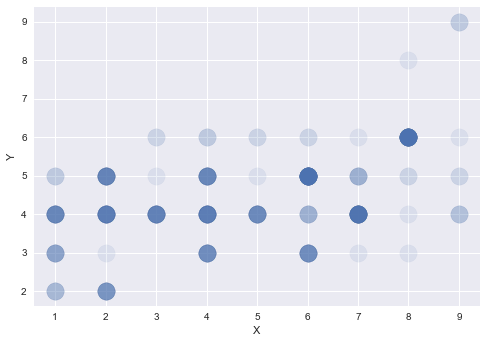

In [249]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300)

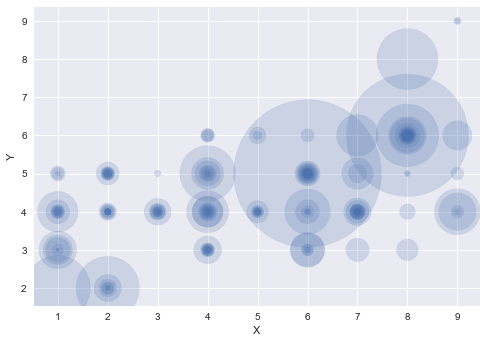

In [250]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area'])

In [251]:
corr_matrix = work_set.corr()
corr_matrix['area'].sort_values(ascending=False)

area    1.000000
temp    0.089430
X       0.079905
Y       0.065098
DMC     0.047842
FFMC    0.042985
DC      0.040810
ISI     0.020522
wind    0.018388
rain   -0.022306
RH     -0.113644
Name: area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a217b0850>,
      dtype=object)

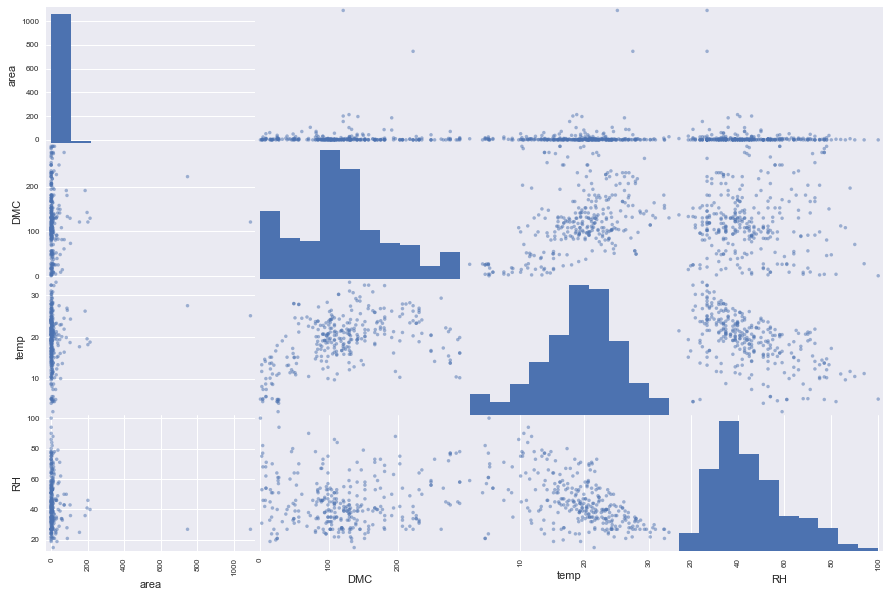

In [252]:
from pandas.plotting import scatter_matrix

attributes = ['area', 'DMC', 'temp', 'RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [253]:
fires = work_set.drop('area', axis=1)
fires_labels = work_set['area'].copy()

In [254]:
fires['month'].unique()

array(['dec', 'apr', 'sep', 'aug', 'mar', 'jun', 'may', 'jul', 'feb',
       'oct', 'jan', 'nov'], dtype=object)

In [255]:
fires['day'].unique()

array(['thu', 'sun', 'mon', 'fri', 'tue', 'sat', 'wed'], dtype=object)

In [256]:
from sklearn.preprocessing import LabelBinarizer

month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = fires['month']
days = fires['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)

In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = fires.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [258]:
scaled_features

array([[-0.31185997,  1.40492881, -0.9460493 , ...,  1.00309309,
         0.49250422, -0.10726835],
       [ 0.94805432,  0.5343901 , -1.3712803 , ...,  1.87737311,
        -1.15203617, -0.10726835],
       [-1.15180283,  0.5343901 ,  0.15640143, ..., -0.05853266,
        -0.93983741, -0.10726835],
       ...,
       [-0.31185997, -1.20668732, -0.04833942, ..., -0.05853266,
        -0.4623902 , -0.10726835],
       [ 0.10811146, -0.33614861,  0.70762679, ..., -0.12098123,
         1.23519988, -0.10726835],
       [ 0.52808289, -1.20668732, -0.41057324, ...,  0.37860736,
        -0.67458896, -0.10726835]])

In [259]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [260]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [261]:
from sklearn.pipeline import Pipeline
import numpy as np

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((fires['month'].unique(), fires['day'].unique()), axis=0)

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

In [262]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [263]:
fires_prepared = full_pipeline.fit_transform(fires)

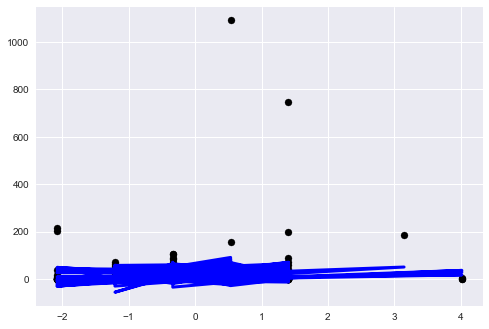

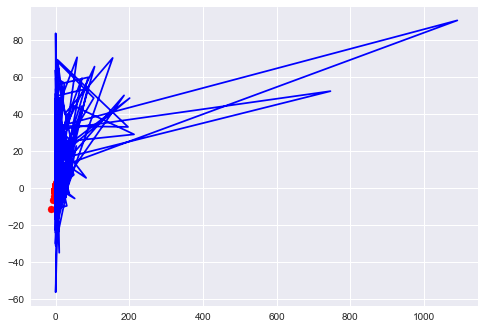

0.08124443212062593

In [264]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(fires_prepared, fires_labels)
plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], lr_model.predict(fires_prepared), color='blue', linewidth=3)
plt.show()
plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, lr_model.predict(fires_prepared), color = 'blue')
plt.show()

r2_score(fires_labels, lr_model.predict(fires_prepared))

In [265]:
from sklearn.metrics import mean_squared_error

fires_predictions = lr_model.predict(fires_prepared)
lr_mse = mean_squared_error(fires_labels, fires_predictions)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)

76.7469026326463


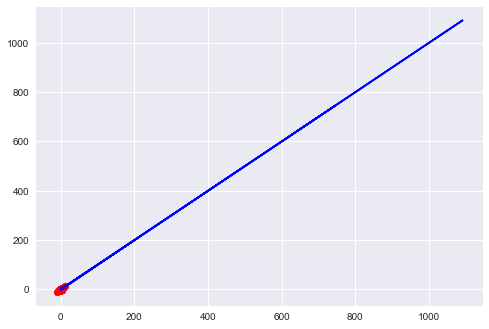

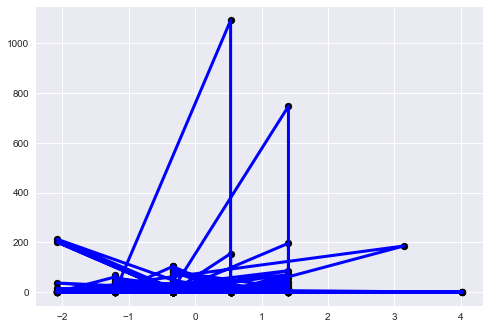

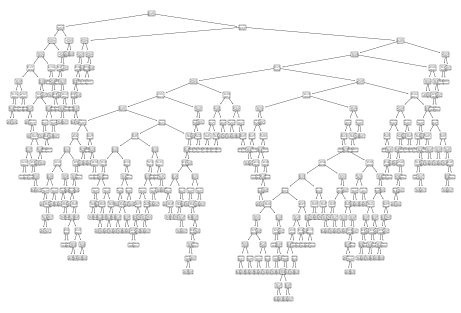

In [266]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtr_model = DecisionTreeRegressor()
dtr_model.fit(fires_prepared, fires_labels)
plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, dtr_model.predict(fires_prepared), color = 'blue')
plt.show()
plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], dtr_model.predict(fires_prepared), color='blue', linewidth=3)
plt.show()

tree.plot_tree(dtr_model)
plt.show()

In [267]:
fires_predictions = dtr_model.predict(fires_prepared)
dtr_mse = mean_squared_error(fires_labels, fires_predictions)
dtr_rmse = np.sqrt(dtr_mse)
dtr_r2 = r2_score(fires_labels, dtr_model.predict(fires_prepared))

print(dtr_rmse)
print(dtr_r2)

0.6368341666207754
0.9999367397387873


In [268]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = np.sqrt(-dtr_scores)

lr_scores = cross_val_score(lr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

In [269]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(dtr_rmse_scores)
display_scores(lr_rmse_scores)

Scores:  [ 30.9163958  136.402718   241.26421976 138.40913434  41.95622556
  54.0319023  252.83253554  42.07096588  53.9507716  204.91187961]
Mean:  119.6746748404651
Standard Deviation:  83.05441103484557
Scores:  [ 38.6567351   32.70568957  44.3997363  134.83003681  21.25738759
  36.6734763  196.47543303  27.37532729  31.6647211   49.18779437]
Mean:  61.3226337463401
Standard Deviation:  54.48003763660347


/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


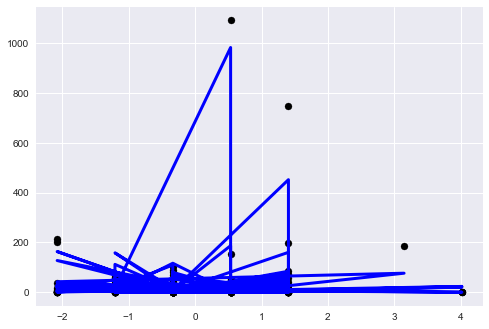

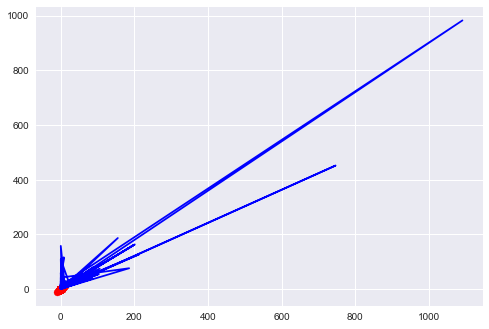

Scores:  [ 44.88169199  71.02331267  84.49544022 135.25112519  23.93568549
  42.02679917 210.1762776   18.52970909  44.88749716  76.00911929]
Mean:  75.12166578670629
Standard Deviation:  55.414111097454466
0.8863183118072054


In [270]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(fires_prepared, fires_labels)

plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], rfr_model.predict(fires_prepared), color='blue', linewidth=3)
plt.show()

plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, rfr_model.predict(fires_prepared), color = 'blue')
plt.show()

rfr_scores = cross_val_score(rfr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)
rfr_r2 = r2_score(fires_labels, rfr_model.predict(fires_prepared))
print(rfr_r2)

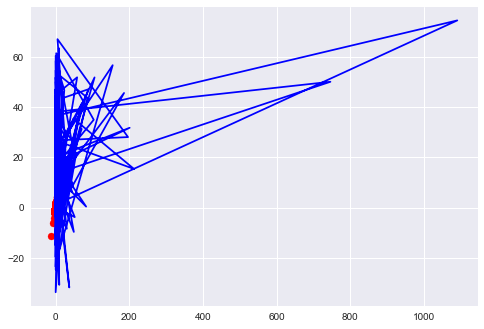

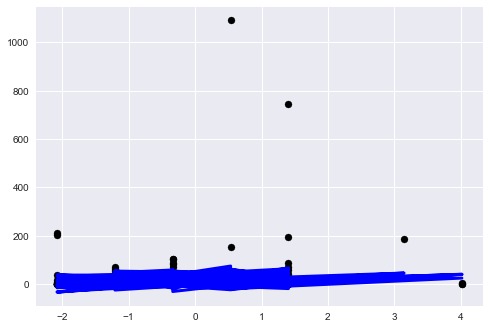

Scores:  [ 28.18476621  30.16894765  42.28776282 134.54453294  20.29680037
  38.4626     198.44645488  23.14462574  32.71088873  48.48295102]
Mean:  59.67303303672507
Standard Deviation:  55.87031734196947
0.0652508466747318


In [271]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(fires_prepared, fires_labels)

plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, sgd_model.predict(fires_prepared), color = 'blue')
plt.show()

plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], sgd_model.predict(fires_prepared), color='blue', linewidth=3)
plt.show()

sgd_scores = cross_val_score(sgd_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

sgd_r2 = r2_score(fires_labels, sgd_model.predict(fires_prepared))
print(sgd_r2)

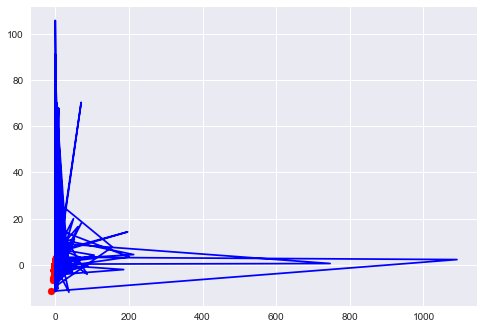

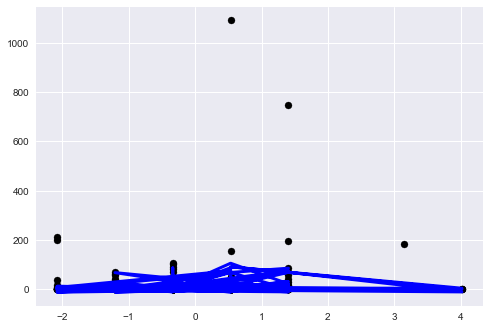

Scores:  [ 28.93731536  18.32394723  50.14751876 136.61774232  14.86204257
  38.29766058 202.81200958  12.22225688  36.92507298  41.66371922]
Mean:  58.08092854767351
Standard Deviation:  58.89599836099691


In [272]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(fires_prepared, fires_labels)

plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, ransac.predict(fires_prepared), color = 'blue')
plt.show()

plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], ransac.predict(fires_prepared), color='blue', linewidth=3)
plt.show()

ransac_scores = cross_val_score(ransac, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
ransac_rmse_scores = np.sqrt(-ransac_scores)

display_scores(ransac_rmse_scores)

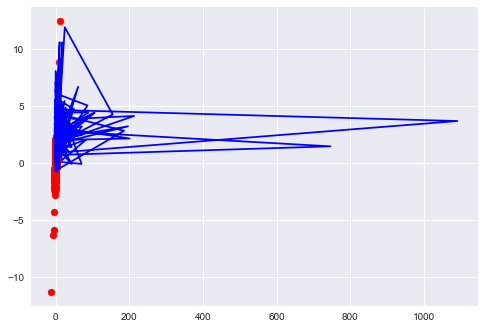

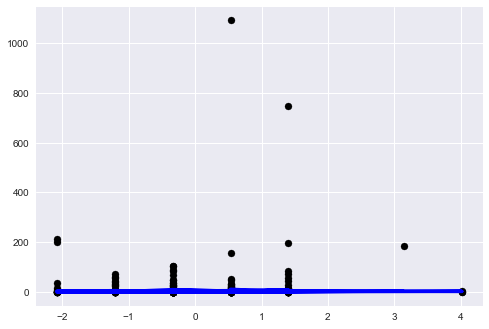

Scores:  [ 29.04286482  13.92575024  48.5132861  136.32004373  12.58373673
  39.29279705 202.22908955  10.86746514  22.02287052  40.25454215]
Mean:  55.505244604149844
Standard Deviation:  59.990167328282624


In [273]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', gamma=0.1)
svr.fit(fires_prepared, fires_labels)

plt.scatter(fires_prepared, fires_prepared, color = 'red')
plt.plot(fires_labels, svr.predict(fires_prepared), color = 'blue')
plt.show()

plt.scatter(fires_prepared[:, 1], fires_labels,  color='black')
plt.plot(fires_prepared[:, 1], svr.predict(fires_prepared), color='blue', linewidth=3)
plt.show()

svr_scores = cross_val_score(svr, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)

display_scores(svr_rmse_scores)

In [274]:
from sklearn.model_selection import GridSearchCV

grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_rfr_model = RandomForestRegressor()
grid_search = GridSearchCV(grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(fires_prepared, fires_labels)

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [275]:
print('Best: ',  np.sqrt(-grid_search.best_score_), grid_search.best_params_)

Best:  82.96596258013393 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [276]:
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'alpha': np.random.uniform(0, 0.001, 5),
    'epsilon': np.random.uniform(0, 0.1, 5),
    'l1_ratio': np.random.uniform(0, 0.1, 5),
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
random_sgd_model = SGDRegressor()
random_sgd_search = RandomizedSearchCV(random_sgd_model, n_iter=100, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_sgd_search.fit(fires_prepared, fires_labels)

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=None,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0...
                                        'epsilon': array([0.04632571, 0.05801306, 0.06616329, 0.01014927, 0.01427688]),
                                        'l1_ratio': array([0.06337951, 0.01918943, 0.05142468, 0.03528804, 0.00

In [277]:
print('Best: ', np.sqrt(-random_sgd_search.best_score_), random_sgd_search.best_params_)

Best:  81.00900209149019 {'loss': 'squared_loss', 'learning_rate': 'constant', 'l1_ratio': 0.0014712796749403513, 'epsilon': 0.010149271483745049, 'alpha': 0.0006300337211211699}


In [278]:
random_params = {
    'C': np.random.uniform(0.5, 1.5, 5),
    'epsilon': np.random.uniform(0, 0.2, 5),
    'degree': [2, 3, 4, 5, 6],
}
random_svr_model = SVR()
random_svr_search = RandomizedSearchCV(random_svr_model, n_iter=50, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_svr_search.fit(fires_prepared, fires_labels)

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Doshi/opt/anaconda3/lib/python3.7/si

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': array([1.23929507, 1.48581445, 1.3681009 , 1.24336172, 1.10882658]),
                                        'degree': [2, 3, 4, 5, 6],
                                        'epsilon': array([0.0836798 , 0.03565265, 0.07164023, 0.03645864, 0.06781851])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [279]:
print('Best: ', np.sqrt(-random_svr_search.best_score_), random_svr_search.best_params_)

Best:  81.49877125517428 {'epsilon': 0.035652647259917396, 'degree': 4, 'C': 1.3681009019522241}


In [280]:
feature_names = np.concatenate((numerical_attributes, categorical_classes), axis=0)
sgd_importances = zip(sgd_model.coef_, feature_names)

for feature in sorted(sgd_importances, key=lambda t: t[0]):
    print(feature)

(-14.552895993306398, 'jul')
(-13.025255659709789, 'DC')
(-12.684896580661498, 'jun')
(-10.295419790510733, 'mar')
(-7.938127909463297, 'mon')
(-7.738833888882393, 'fri')
(-6.755017384748048, 'RH')
(-3.6900870627628466, 'sun')
(-2.015239874335849, 'wed')
(-1.9095854205410494, 'nov')
(-1.7234122199694688, 'FFMC')
(-1.0819853962833352, 'ISI')
(-0.9250379365545779, 'rain')
(0.30697772492100944, 'apr')
(1.427958868154909, 'thu')
(1.5067670246963132, 'may')
(2.0112806696752443, 'jan')
(2.1396582226250658, 'aug')
(2.391231788706523, 'Y')
(3.3535391087004034, 'dec')
(3.8802341438789383, 'oct')
(4.060035541970441, 'feb')
(4.16023808931194, 'tue')
(6.395889215114442, 'wind')
(7.203633317273692, 'X')
(7.84838803024549, 'temp')
(9.396745082277615, 'DMC')
(23.201548016984585, 'sat')
(29.591761587559215, 'sep')


In [281]:
ransac_importances = zip(ransac.estimator_.coef_, feature_names)

for feature in sorted(ransac_importances, key=lambda t: t[0]):
    print(feature)

(-18.80093375646857, 'sep')
(-17.796847647686317, 'jul')
(-15.690496331127237, 'aug')
(-7.633326392305788, 'FFMC')
(-6.873151500744513, 'feb')
(-5.234700867466206, 'thu')
(-4.181422948671759, 'RH')
(-3.587495185170945, 'mar')
(-3.566974985703412, 'temp')
(-3.015484872966052, 'fri')
(-2.8375279109668208, 'wed')
(-1.950975949288323, 'apr')
(-1.5932171356947717, 'mon')
(-0.9951688644649589, 'wind')
(-0.32923117093997323, 'oct')
(-0.2719467452190688, 'Y')
(-0.10077636850987036, 'X')
(0.0, 'jan')
(0.0, 'nov')
(1.7763568394002527e-14, 'rain')
(0.20619232894735107, 'may')
(0.32539008194506747, 'tue')
(1.3389443442545874, 'dec')
(1.6222780471547058, 'sat')
(1.6547916713081392, 'DMC')
(3.0047953346224006, 'ISI')
(6.075360010221373, 'DC')
(10.733262657993965, 'sun')
(63.483994868224116, 'jun')


In [282]:
svr_importances = zip(svr.coef_[0], feature_names)

for feature in sorted(svr_importances, key=lambda t: t[0]):
    print(feature)

(-1.9051588638356758, 'jun')
(-1.0, 'nov')
(-0.9023240374538211, 'thu')
(-0.8735466981320954, 'aug')
(-0.852111525569696, 'RH')
(-0.6455618493787547, 'temp')
(-0.6298924579963221, 'jan')
(-0.5691301227658476, 'fri')
(-0.4065444976358247, 'feb')
(-0.31937792117373665, 'DC')
(-0.2186727528423118, 'sat')
(-0.17908848807258515, 'ISI')
(-0.17253412084075448, 'jul')
(-0.14694249637531165, 'rain')
(-0.11690033830580515, 'mon')
(-0.10143863539794529, 'apr')
(-0.03941659025634969, 'X')
(0.0, 'mar')
(0.0, 'may')
(0.006273931694652624, 'DMC')
(0.07086645288505, 'FFMC')
(0.17727203536244796, 'sun')
(0.1789833688252216, 'Y')
(0.3278268516931151, 'wed')
(0.6512790279130769, 'sep')
(0.7332004511012333, 'wind')
(1.3019283643122241, 'tue')
(1.719750473868579, 'oct')
(2.7180857720569644, 'dec')


In [283]:
num_fires_prepared = numerical_pipeline.fit_transform(fires)

num_sgd_model = SGDRegressor()
num_sgd_model.fit(num_fires_prepared, fires_labels)
num_sgd_scores = cross_val_score(num_sgd_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_sgd_rmse_scores = np.sqrt(-num_sgd_scores)

display_scores(num_sgd_rmse_scores)

Scores:  [ 25.6877122   25.85599804  42.23795931 131.75172085  20.19750655
  35.36995459 198.88243057  21.26934726  25.84333864  46.05553715]
Mean:  57.3151505155005
Standard Deviation:  56.635022287058206


In [284]:
num_svr_model = SVR(kernel='linear')
num_svr_model.fit(num_fires_prepared, fires_labels)
num_svr_scores = cross_val_score(num_svr_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_svr_rmse_scores = np.sqrt(-num_svr_scores)

display_scores(num_svr_rmse_scores)

Scores:  [ 29.18578836  13.94572322  48.4241815  136.30892556  12.65365817
  39.36846763 202.38419029  10.95499331  22.05022139  40.67334051]
Mean:  55.594948993340225
Standard Deviation:  59.994358902008614


In [285]:
num_ransac_model = RANSACRegressor()
num_ransac_model.fit(num_fires_prepared, fires_labels)
num_ransac_scores = cross_val_score(num_ransac_model, num_fires_prepared, fires_labels,
                                    scoring='neg_mean_squared_error', cv=10)
num_ransac_rmse_scores = np.sqrt(-num_ransac_scores)

display_scores(num_ransac_rmse_scores)

Scores:  [ 29.68711892  14.27577007  49.985555   136.70683694  12.63622749
  39.72154622 202.77255344  10.7424956   28.52466952  40.9949242 ]
Mean:  56.604769741663475
Standard Deviation:  59.74551342455605


In [286]:
grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

num_grid_rfr_model = RandomForestRegressor()
num_grid_search = GridSearchCV(num_grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
num_grid_search.fit(num_fires_prepared, fires_labels)

/Users/Doshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [287]:
print('Best: ',  np.sqrt(-num_grid_search.best_score_), num_grid_search.best_params_)

Best:  84.18537539903687 {'max_features': 4, 'n_estimators': 30}


In [288]:
num_svr_importances = zip(num_svr_model.coef_[0], numerical_attributes)

for feature in sorted(num_svr_importances, key=lambda t: t[0]):
    print(feature)

(-1.275651618780965, 'temp')
(-1.0044425273437243, 'RH')
(-0.7353027413875104, 'DMC')
(-0.3924531308689474, 'X')
(-0.2201053638900845, 'ISI')
(-0.07225785945808028, 'rain')
(0.13380399417128253, 'FFMC')
(0.4591681561974852, 'Y')
(0.6594410371444642, 'wind')
(0.9447039490597922, 'DC')


In [289]:
num_ransac_importances = zip(num_ransac_model.estimator_.coef_, numerical_attributes)

for feature in sorted(num_ransac_importances, key=lambda t: t[0]):
  print(feature)

(-0.7462989720879922, 'DMC')
(-0.5165064585163973, 'ISI')
(-0.33272277849730286, 'FFMC')
(6.983861933204255e-30, 'rain')
(0.09632773324395437, 'X')
(0.12945719294665511, 'Y')
(0.312168862349933, 'DC')
(1.1394531819476232, 'wind')
(1.8527565785651137, 'RH')
(1.9514201950115344, 'temp')


In [290]:
num_sgd_importances = zip(num_sgd_model.coef_, numerical_attributes)

for feature in sorted(num_sgd_importances, key=lambda t: t[0]):
    print(feature)

(-8.049462859794765, 'RH')
(-2.760297473789892, 'ISI')
(-1.7297599386316271, 'rain')
(-1.1702581710470021, 'FFMC')
(1.6322962854752399, 'Y')
(1.9576349935389026, 'DC')
(3.841897219596209, 'DMC')
(3.994763142597716, 'temp')
(4.5228195237685584, 'wind')
(6.338641637895276, 'X')


In [291]:
from sklearn.externals import joblib

joblib.dump(sgd_model, '../models/sgd_model.pkl')
joblib.dump(dtr_model, '../models/svr_model.pkl')
joblib.dump(ransac, '../models/ransac_model.pkl')
joblib.dump(rfr_model, '../models/rfr_model.pkl')
joblib.dump(lr_model, '../models/lr_model.pkl')
joblib.dump(full_pipeline, '../models/pipeline.pkl')

['../models/pipeline.pkl']

In [292]:
final_model = joblib.load('../models/sgd_model.pkl')

X_test = test_set.drop('area', axis=1)
y_test = test_set['area'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)